##### Trabajo Semanal 6

En esta tarea experimentaremos algunos conceptos presentados en el libro de Holton. DSP Principles and App.

1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett ó triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0 y 
Ω1, aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
W2=max{|W(Ω)|},  ∀ Ω≥Ω0


Sugerencia: Normalice Ω0,1 por Δf=fSN para facilitar la comparación.

Inclusión de librerías

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Tarea semanal N°5
Desparramo espectral
"""

#%%  Librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy



Inicialización de variables

In [2]:
# Inicialización de variables
plt.close('all')
fs=1000
N = 1000
df = fs/N # resolución espectral
ff = np.linspace(0, (N-1)*df, N)

Cálculos de ventanas y sus transformadas de Fourier

In [3]:
# Cálculo de ventanas
winBartlett = np.bartlett(N)
winHann = np.hanning(N)
winBlackman = np.blackman(N)
winFlatTop = scipy.signal.windows.flattop(N)

#Transformada de Fourier de las ventanas
ft_winBartlett = np.fft.fft(winBartlett) / winBartlett.shape[0]
ft_winHann = np.fft.fft(winHann) / winHann.shape[0]
ft_winBlackman = np.fft.fft(winBlackman) / winBlackman.shape[0]
ft_winFlatTop = np.fft.fft(winFlatTop) / winFlatTop.shape[0]

bfrec = ff <= fs/2

Presentación gráfica de los resultados

/tmp/ipykernel_21459/1520696506.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_winBartlett[bfrec])**2), 'red',label='Bartlett')


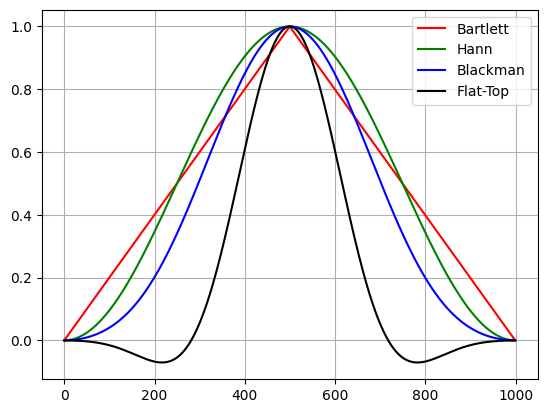

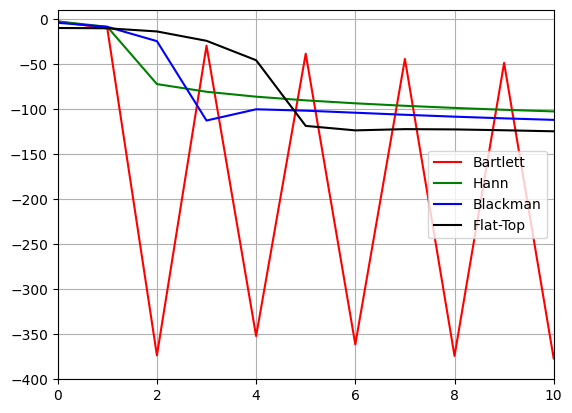

In [4]:
# Visualización de amplitud respecto las muestras
plt.figure(1)
plt.plot(winBartlett, 'red',label='Bartlett')
plt.plot(winHann, 'green',label='Hann')
plt.plot(winBlackman, 'blue',label='Blackman')
plt.plot(winFlatTop, 'black',label='Flat-Top')
plt.grid()
axes_hdl = plt.gca()
axes_hdl.legend()

# Visualización de la respuesta en frecuencia
plt.figure(2)
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_winBartlett[bfrec])**2), 'red',label='Bartlett')
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_winHann[bfrec])**2), 'green',label='Hann')
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_winBlackman[bfrec])**2), 'blue',label='Blackman')
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_winFlatTop[bfrec])**2), 'black',label='Flat-Top')
plt.grid()
plt.xlim([0,10])
plt.ylim([-400,10])
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 